In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import trim_mean
df = pd.read_csv('train.csv')
print("--- First 5 Rows ---")
print(df.head())
print("\n--- Last 5 Rows ---")
print(df.tail())
print("\n--- DataFrame Info ---")
df.info()
print("\n--- Descriptive Statistics ---")
print(df.describe())

--- First 5 Rows ---
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.050

Missing values before cleaning:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values after cleaning:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Number of duplicate rows: 0


/var/folders/b6/n_kwnk5n3cqcd9jzzjqhbkbw0000gn/T/ipykernel_3383/2615356159.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(age_median, inplace=True)
/var/folders/b6/n_kwnk5n3cqcd9jzzjqhbkbw0000gn/T/ipykernel_3383/2615356159.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

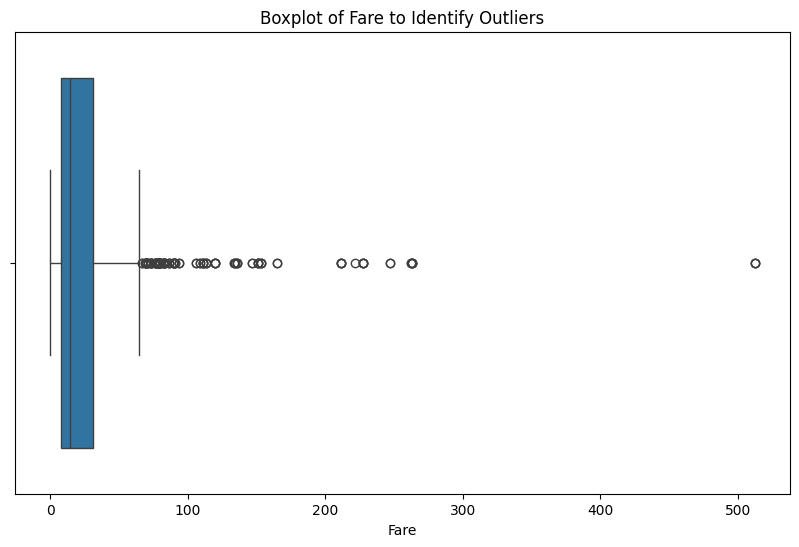

In [ ]:
print("Missing values before cleaning:\n", df.isnull().sum())
age_median = df['Age'].median()
df['Age'].fillna(age_median, inplace=True)
df.drop(columns=['Cabin'], inplace=True)
embarked_mode = df['Embarked'].mode()[0]
df['Embarked'].fillna(embarked_mode, inplace=True)
print("\nMissing values after cleaning:\n", df.isnull().sum())
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Fare'])
plt.title('Boxplot of Fare to Identify Outliers')
plt.show()

--- Analysis of 'Age' ---
Mean Age: 29.36
Median Age: 28.00
Trimmed Mean (10%) Age: 28.83
Age Range: 79.58
Age Variance: 169.51
Age Standard Deviation: 13.02


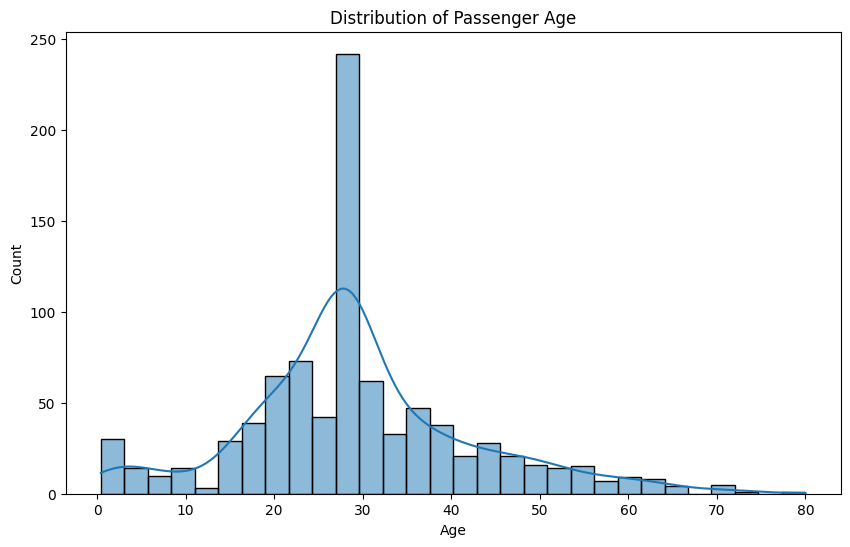

In [ ]:
print("--- Analysis of 'Age' ---")
print(f"Mean Age: {df['Age'].mean():.2f}")
print(f"Median Age: {df['Age'].median():.2f}")
print(f"Trimmed Mean (10%) Age: {trim_mean(df['Age'], 0.1):.2f}")
print(f"Age Range: {df['Age'].max() - df['Age'].min():.2f}")
print(f"Age Variance: {df['Age'].var():.2f}")
print(f"Age Standard Deviation: {df['Age'].std():.2f}")
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Distribution of Passenger Age')
plt.show()


--- Analysis of 'Pclass' ---
Frequency counts for Pclass:
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Mode for Pclass: 3


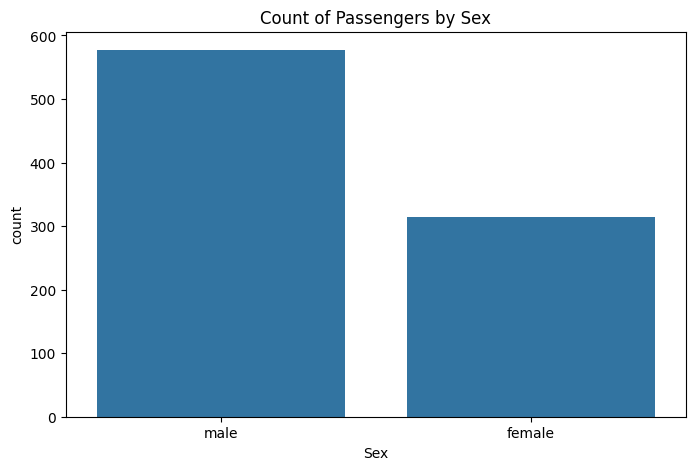

In [ ]:
print("\n--- Analysis of 'Pclass' ---")
print("Frequency counts for Pclass:\n", df['Pclass'].value_counts())
print(f"\nMode for Pclass: {df['Pclass'].mode()[0]}")
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', data=df)
plt.title('Count of Passengers by Sex')
plt.show()


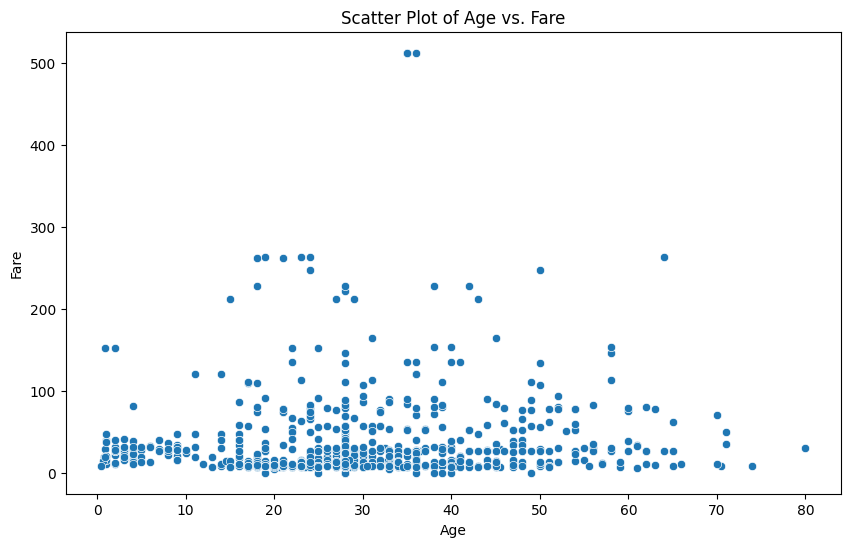

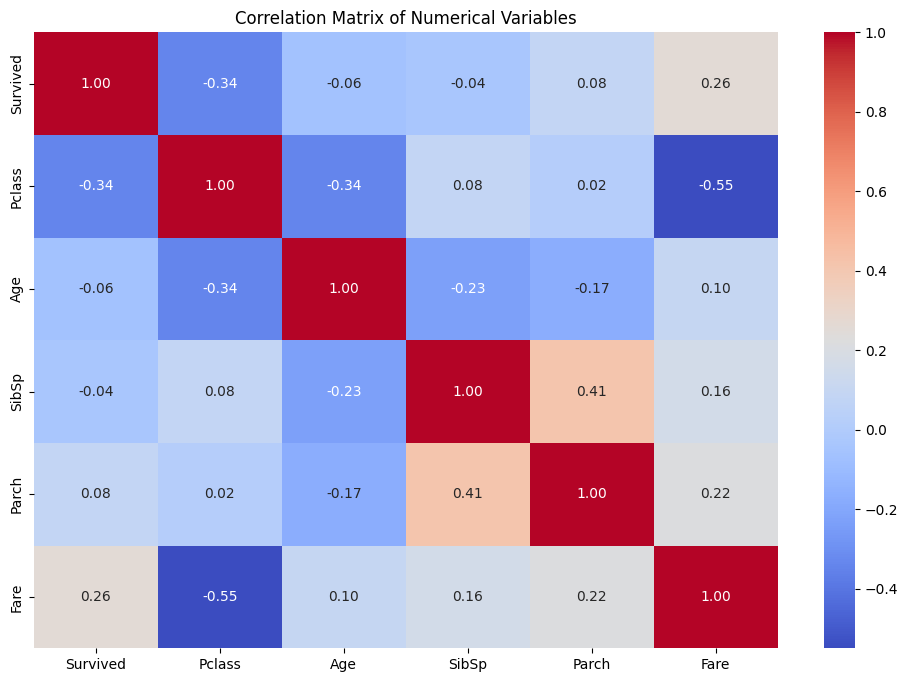

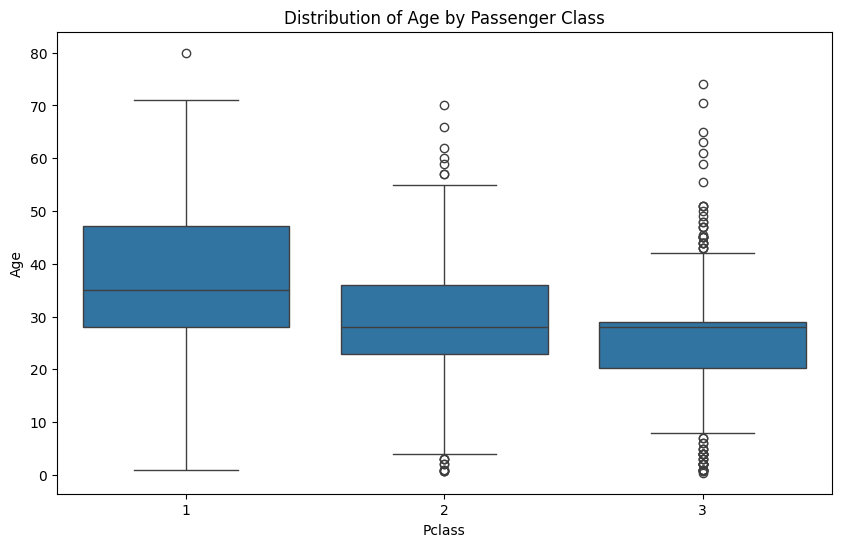

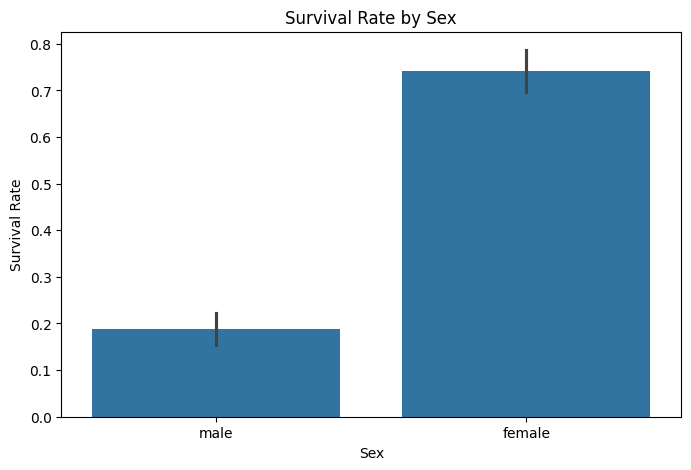

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', data=df)
plt.title('Scatter Plot of Age vs. Fare')
plt.show()
numerical_df = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Distribution of Age by Passenger Class')
plt.show()
plt.figure(figsize=(8, 5))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.show()

In [ ]:
# Based on this EDA, the 3-5 most important insights are:

# Survival was not random; it was heavily influenced by social factors. Your gender and passenger class were strong predictors of whether you survived the Titanic disaster.

# Gender was the most significant factor in survival. Females had a survival rate of approximately 74%, while males had a survival rate of only about 19%. This reflects the "women and children first" protocol.

# Socio-economic status (Passenger Class) was a major factor. Over 60% of 1st class passengers survived, compared to only about 24% of 3rd class passengers. This was likely due to the location of their cabins and their access to the lifeboats.

# The majority of passengers were young adults, with the average age being around 30. Passengers in 1st class were, on average, older and paid significantly higher fares.